In [5]:
import pandas as pd
import numpy as np

In [14]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

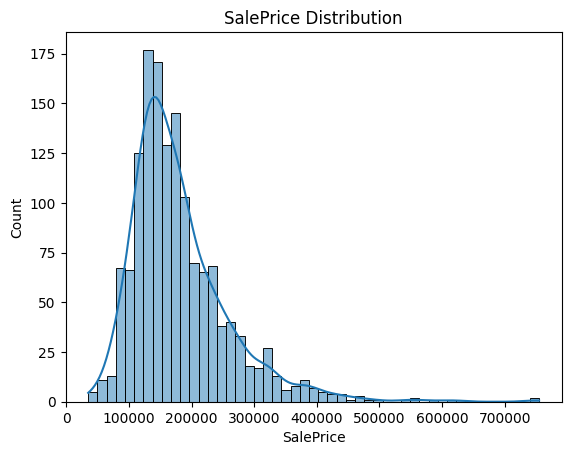

In [3]:
# 타겟 분포
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()



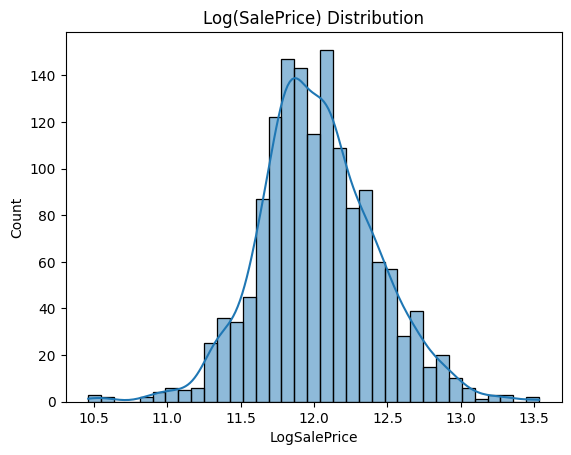

In [ ]:
# ✔️ 정규성 판단용 시각화 (로그 변환)
train['LogSalePrice'] = np.log1p(train['SalePrice'])

sns.histplot(train['LogSalePrice'], kde=True)
plt.title("Log(SalePrice) Distribution")
plt.show()

In [16]:
len(train)

1460

In [17]:
# 결측치 많은 컬럼 상위 10개
nulls = train.isnull().sum().sort_values(ascending=False)
print(nulls[nulls > 0].head(10))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64


In [9]:
# 수치, 범주형 컬럼 분리
numerical_feats = train.select_dtypes(include=['int64', 'float64']).columns
categorical_feats = train.select_dtypes(include=['object']).columns

print("수치형 변수 개수:", len(numerical_feats))
print("범주형 변수 개수:", len(categorical_feats))

수치형 변수 개수: 39
범주형 변수 개수: 43


In [10]:
# 수치형 컬럼 중에서 SalePrice와의 상관관계
corr_matrix = train[numerical_feats].corr()
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)

print("SalePrice와 상관 높은 변수:")
print(top_corr)

SalePrice와 상관 높은 변수:
SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


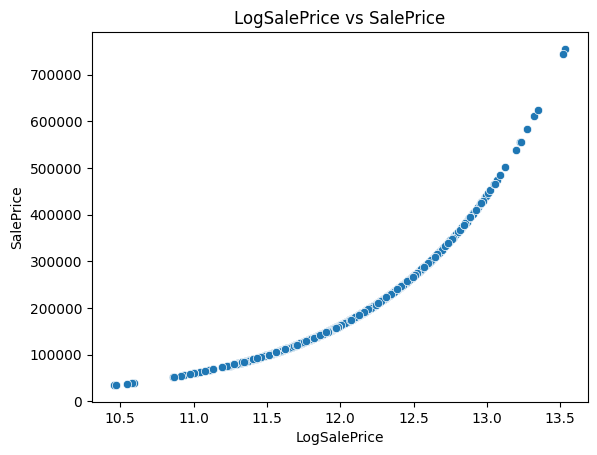

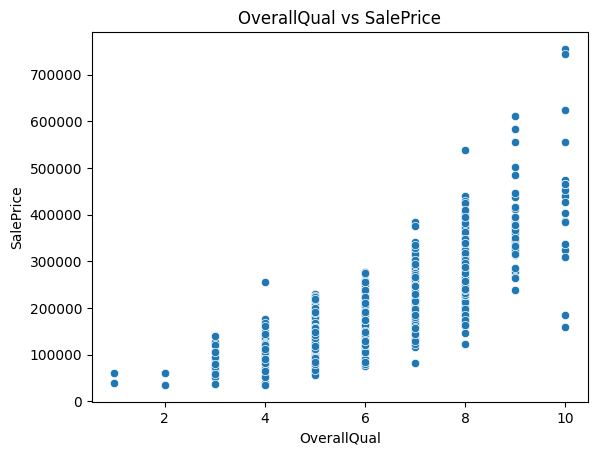

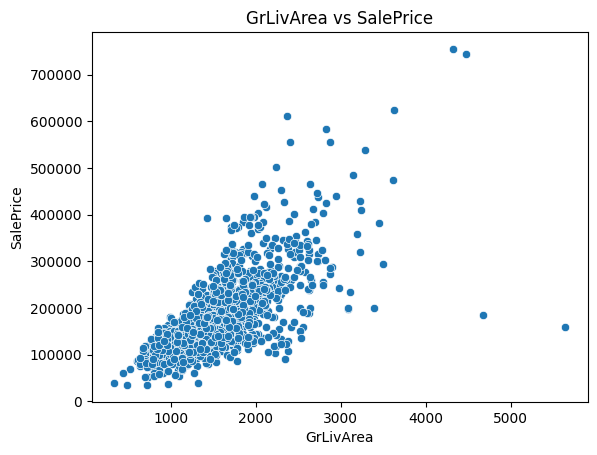

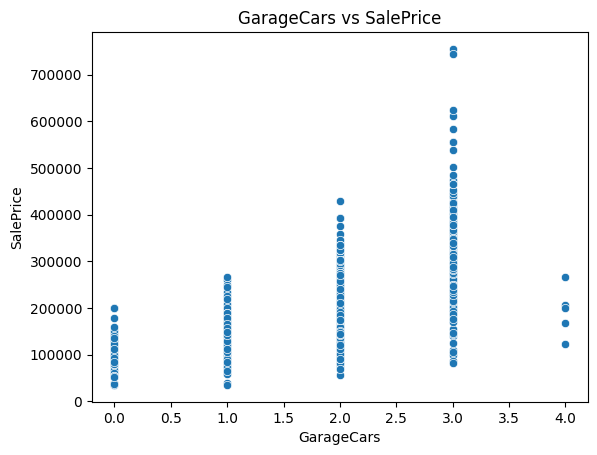

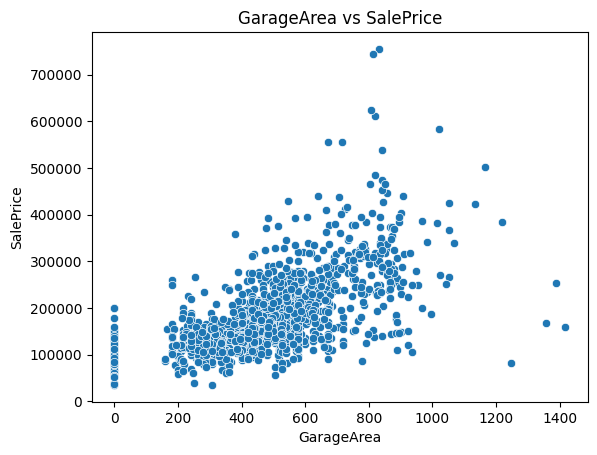

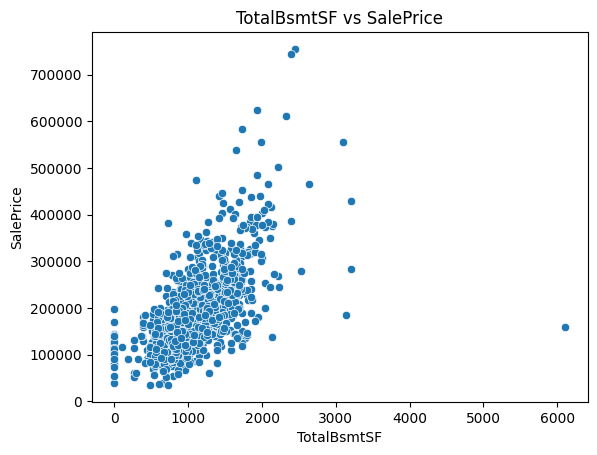

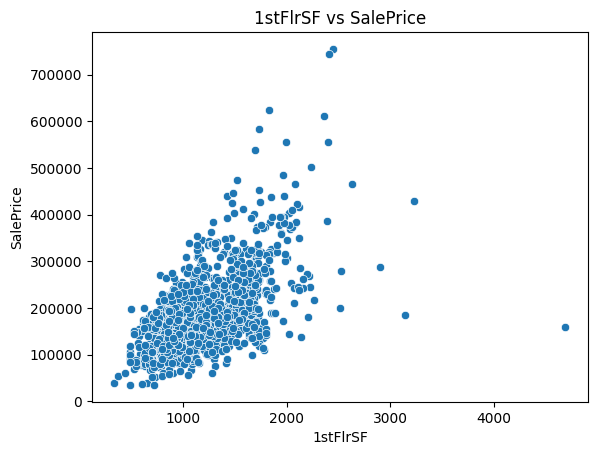

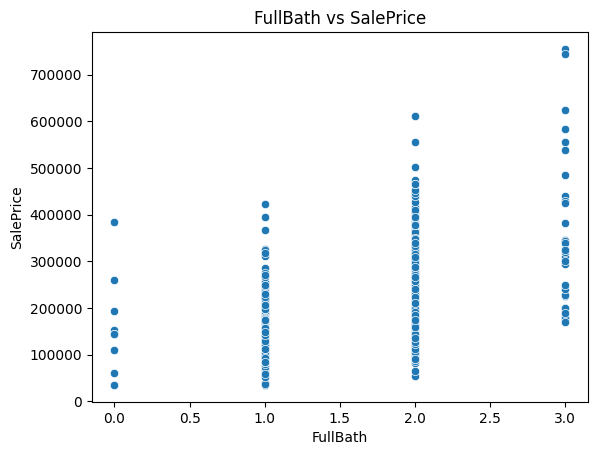

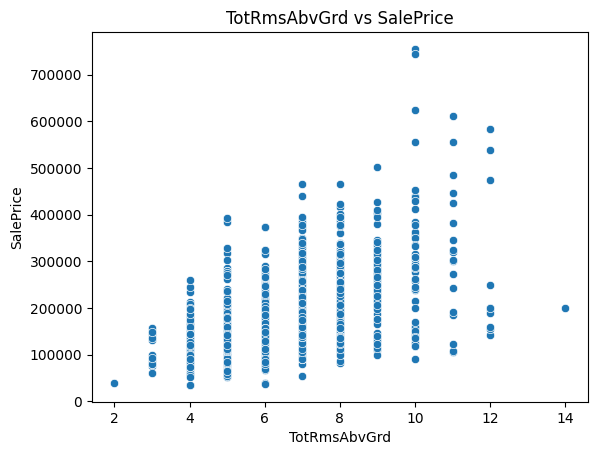

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = top_corr.index.drop("SalePrice")  # 자기 자신은 제외

for col in top_features:
    sns.scatterplot(data=train, x=col, y='SalePrice')
    plt.title(f"{col} vs SalePrice")
    plt.show()

## 🔚 결론: 피처 해석 정리

| Feature       | 유의미함       | 이상치 있음?     | 변환 추천                       |
|---------------|----------------|------------------|---------------------------------|
| OverallQual   | ✅ 매우 중요    | ❌               | ❌ (그대로 사용)                |
| GrLivArea     | ✅              | ✅               | ✅ 로그변환                     |
| GarageCars    | ✅              | ❗ 일부           | ❌                              |
| GarageArea    | ✅              | ✅               | ❌                              |
| TotalBsmtSF   | ✅              | ❗ 0 있음         | ✅ 로그변환 or 파생 변수       |
| 1stFlrSF      | ✅              | ✅               | ❌                              |
| FullBath      | ✅              | ❗ 분산 큼        | ❌                              |
| TotRmsAbvGrd  | ⭕ 약함         | ❗ 무의미한 증가   | ❌                              |

In [19]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [20]:
# 수치형 피처 중 상관 높은 컬럼 추출 (SalePrice, LogSalePrice 제외)
top_corr_feats = corr_matrix['SalePrice'].drop(['SalePrice', 'LogSalePrice']).sort_values(ascending=False).head(10)
print(top_corr_feats)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [22]:
selected_numerical = top_corr_feats.index.tolist()
print(selected_numerical)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [25]:
# 마이너스 깨짐 방지 
import os
import matplotlib.pyplot as plt
# 윈도우 기본 한글 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'


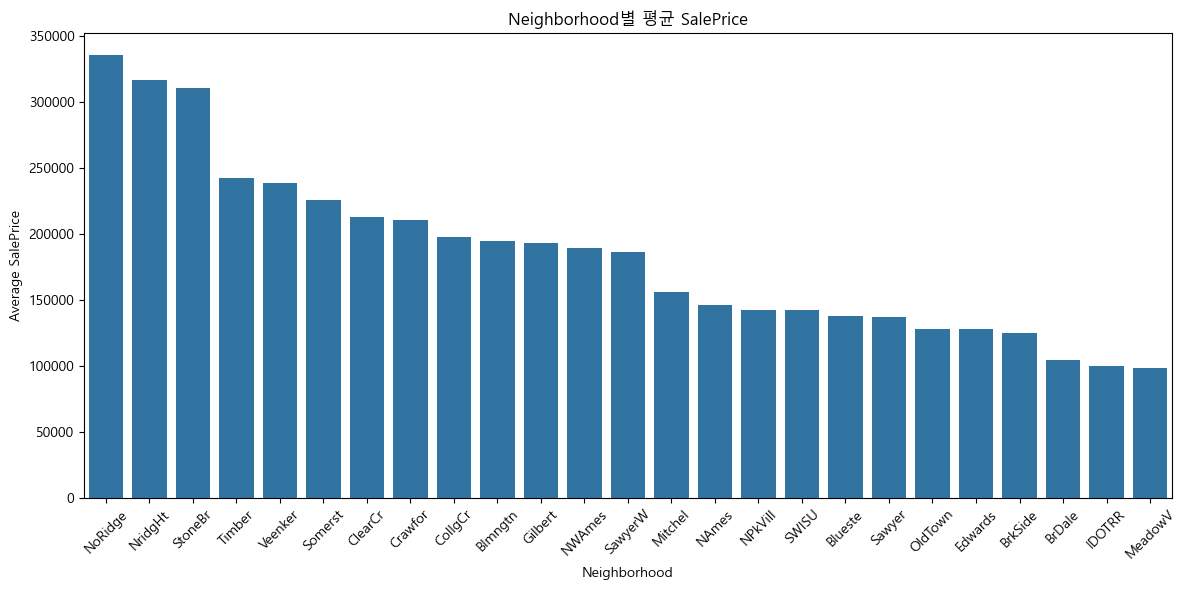

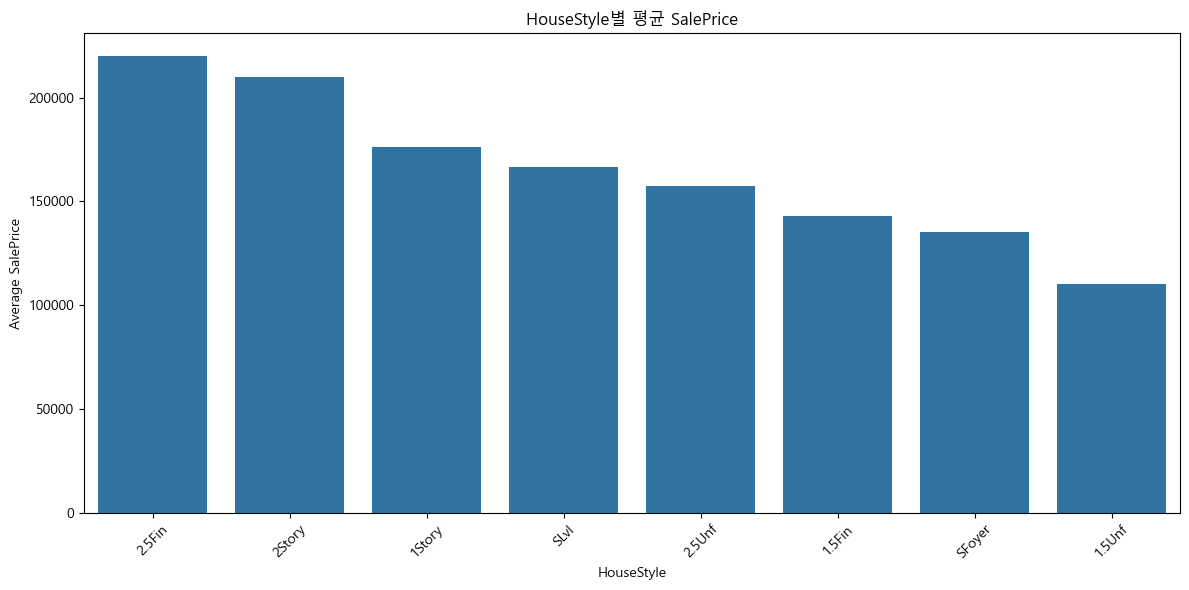

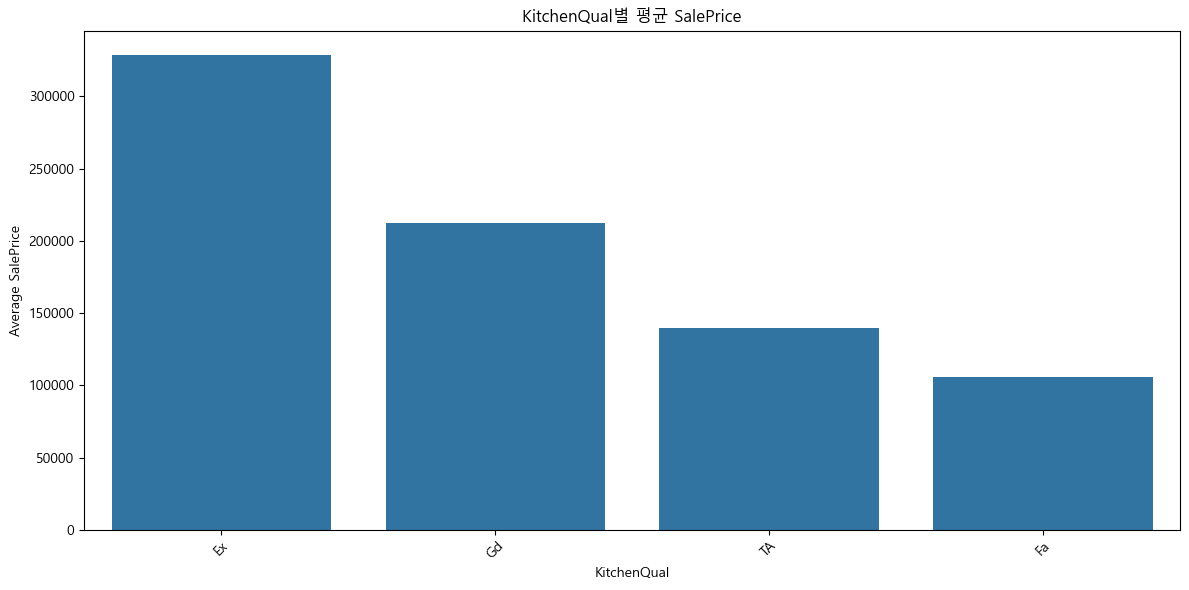

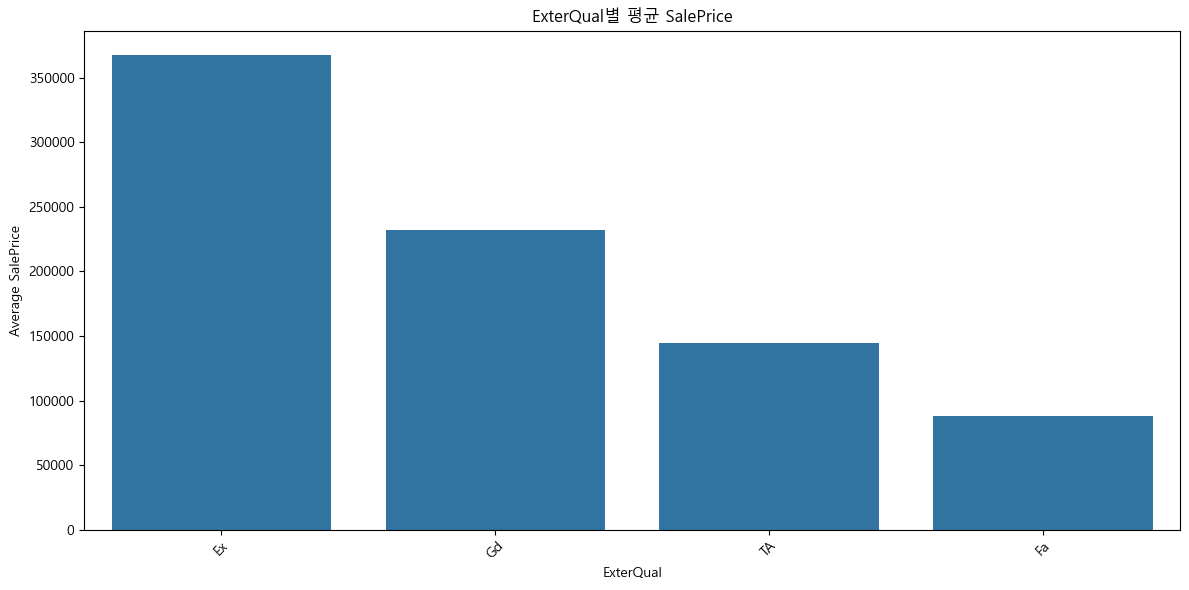

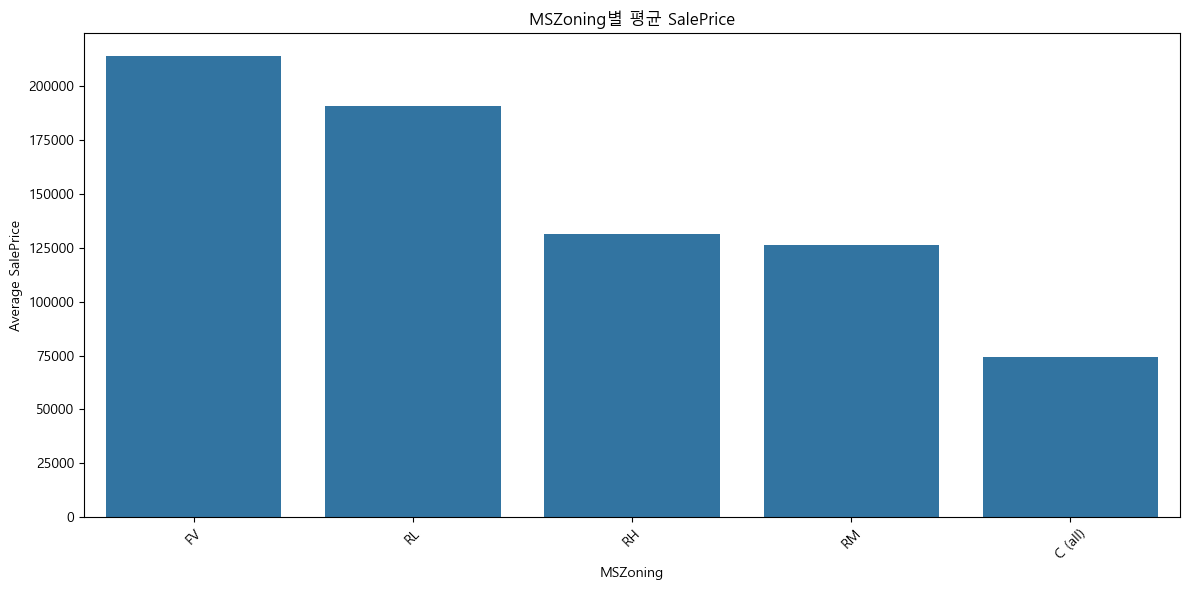

In [26]:
selected_categorical = ['Neighborhood', 'HouseStyle', 'KitchenQual', 'ExterQual', 'MSZoning']

for col in selected_categorical:
    # 범주별 평균 SalePrice 계산
    mean_prices = train.groupby(col)['SalePrice'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=mean_prices.index, y=mean_prices.values)
    plt.xticks(rotation=45)
    plt.title(f"{col}별 평균 SalePrice")
    plt.ylabel("Average SalePrice")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
# 🔍 해석 방법 및 인사이트 예시
# 1. Neighborhood (지역)
# NoRidge, NridgHt, StoneBr 등의 지역은 평균 집값이 높고,

# MeadowV, IDOTRR 등은 평균 집값이 낮아.

# 👉 이건 모델에 적용 시 지역별 더미 변수(One-hot encoding) 생성하거나 고가/중가/저가 지역으로 묶어 파생 변수로 만들어도 좋아.

# 2. HouseStyle (주택 유형)
# 2.5Fin과 2Story 주택의 평균 가격이 높고, 1.5Unf, SFoyer는 낮은 편.

# 👉 주택 구조 역시 가격과 관련성이 있으므로 중요한 피처로 간주할 수 있어.

# 3. KitchenQual (주방 품질)
# Ex > Gd > TA > Fa 순으로 가격이 뚜렷하게 달라져.

# 👉 이건 명확한 순서형 변수이므로, Label Encoding 처리를 할 수 있고, 모델이 잘 활용할 수 있는 피처야.

# 4. ExterQual (외부 자재 품질)
# KitchenQual과 비슷하게 품질 등급에 따라 집값이 차이 나.

# 👉 순서형 인코딩 + 파생변수로도 활용 가능.

# 5. MSZoning (용도 구분)
# FV, RL 같은 용도일수록 높은 가격대가 형성되어 있고, C (all)은 평균적으로 낮은 편이야.

# 👉 지역 zoning도 중요한 변수임을 시각적으로 확인할 수 있어.